# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education. 

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms. 
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers, 
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn. 
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc 
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

In [ ]:
import sys
sys executable

In [9]:
!/Users/owner/anaconda3/bin/python -m pip install scipy matplotlib scikit-learn


  Obtaining dependency information for scipy from https://files.pythonhosted.org/packages/b8/f2/1aefbd5e54ebd8c6163ccf7f73e5d17bc8cb38738d312befc524fce84bb4/scipy-1.11.4-cp311-cp311-macosx_10_9_x86_64.whl.metadata
  Using cached scipy-1.11.4-cp311-cp311-macosx_10_9_x86_64.whl.metadata (60 kB)
  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/a9/0d/53afb186adafc7326d093b8333e8a79974c495095771659f4304626c4bc7/matplotlib-3.8.2-cp311-cp311-macosx_10_12_x86_64.whl.metadata
  Using cached matplotlib-3.8.2-cp311-cp311-macosx_10_12_x86_64.whl.metadata (5.8 kB)
  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/08/5d/e5acecd6e99a6b656e42e7a7b18284e2f9c9f512e8ed6979e1e75d25f05f/scikit_learn-1.3.2-cp311-cp311-macosx_10_9_x86_64.whl.metadata
  Using cached scikit_learn-1.3.2-cp311-cp311-macosx_10_9_x86_64.whl.metadata (11 kB)
Using cached scipy-1.11.4-cp311-cp311-macosx_10_9_x86_64.whl (37.2 MB)
Using cached

In [14]:
!/Users/owner/anaconda3/bin/python -m pip install threadpoolctl

  Obtaining dependency information for threadpoolctl from https://files.pythonhosted.org/packages/81/12/fd4dea011af9d69e1cad05c75f3f7202cdcbeac9b712eea58ca779a72865/threadpoolctl-3.2.0-py3-none-any.whl.metadata
  Using cached threadpoolctl-3.2.0-py3-none-any.whl.metadata (10.0 kB)
Using cached threadpoolctl-3.2.0-py3-none-any.whl (15 kB)


## Importing necessary libraries and data

In [16]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# Setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# To tune model, get different metric scores, and split data

from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    classification_report,
    precision_recall_curve
)

from sklearn import metrics

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To help with model building
from sklearn.linear_model import LogisticRegression

# To build classification models 
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


# For tuning the model
from sklearn.model_selection import GridSearchCV

# To supress warnings
import warnings
warnings.filterwarnings("ignore")

## Data Overview

- Observations
- Sanity checks

In [20]:
data = pd.read_csv("ExtraaLearn.csv")
data.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.86100,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.32000,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.07400,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.05700,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.91400,Email Activity,No,No,No,No,No,0


In [21]:
data.shape

(4612, 15)

In [22]:
data.info

<bound method DataFrame.info of            ID  age current_occupation first_interaction profile_completed  \
0      EXT001   57         Unemployed           Website              High   
1      EXT002   56       Professional        Mobile App            Medium   
2      EXT003   52       Professional           Website            Medium   
3      EXT004   53         Unemployed           Website              High   
4      EXT005   23            Student           Website              High   
...       ...  ...                ...               ...               ...   
4607  EXT4608   35         Unemployed        Mobile App            Medium   
4608  EXT4609   55       Professional        Mobile App            Medium   
4609  EXT4610   58       Professional           Website              High   
4610  EXT4611   57       Professional        Mobile App            Medium   
4611  EXT4612   55       Professional           Website            Medium   

      website_visits  time_spent_on_website

In [23]:
data.describe()

,age,website_visits,time_spent_on_website,page_views_per_visit,status
count,4612.00000,4612.00000,4612.00000,4612.00000,4612.00000
mean,46.20121,3.56678,724.01127,3.02613,0.29857
std,13.16145,2.82913,743.82868,1.96812,0.45768
min,18.00000,0.00000,0.00000,0.00000,0.00000
25%,36.00000,2.00000,148.75000,2.07775,0.00000
50%,51.00000,3.00000,376.00000,2.79200,0.00000
75%,57.00000,5.00000,1336.75000,3.75625,1.00000
max,63.00000,30.00000,2537.00000,18.43400,1.00000


In [24]:
data.duplicated().sum()

0

In [126]:
for i in data.describe(include=["object"]).columns:
    print(data[i].value_counts())
    print("*" * 45)

ID
EXT001     1
EXT2884    1
EXT3080    1
EXT3079    1
EXT3078    1
          ..
EXT1537    1
EXT1536    1
EXT1535    1
EXT1534    1
EXT4612    1
Name: count, Length: 4612, dtype: int64
*********************************************
current_occupation
Professional    2616
Unemployed      1441
Student          555
Name: count, dtype: int64
*********************************************
first_interaction
Website       2542
Mobile App    2070
Name: count, dtype: int64
*********************************************
profile_completed
High      2264
Medium    2241
Low        107
Name: count, dtype: int64
*********************************************
last_activity
Email Activity      2278
Phone Activity      1234
Website Activity    1100
Name: count, dtype: int64
*********************************************
print_media_type1
No     4115
Yes     497
Name: count, dtype: int64
*********************************************
print_media_type2
No     4379
Yes     233
Name: count, dtype: int64
********

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

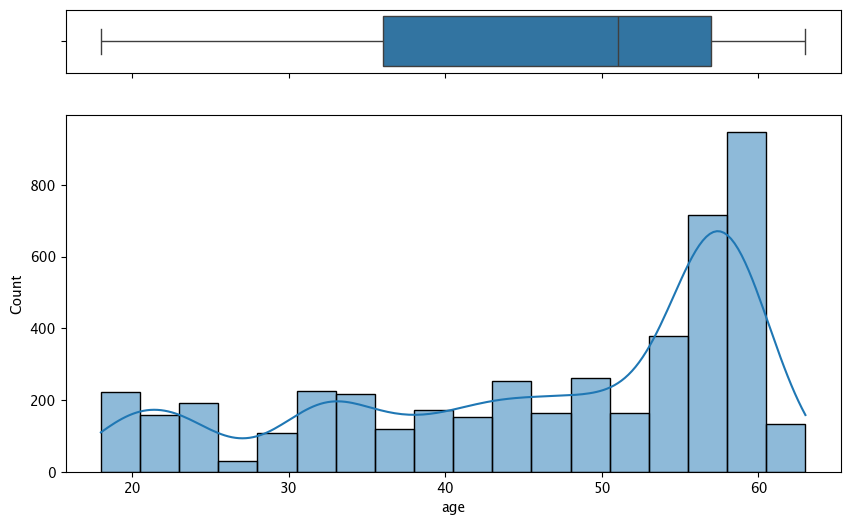

In [26]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (.15, .85)}, figsize=(10, 6))
sns.boxplot(data=data, x="age", ax=ax_box)
sns.histplot(data=data, x="age", kde=True, ax=ax_hist)
ax_box.set(xlabel='age')

plt.show()

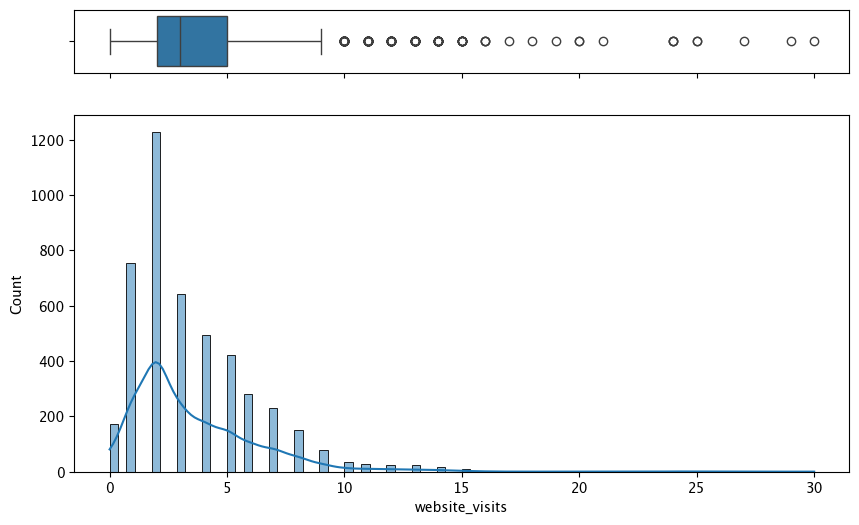

In [27]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (.15, .85)}, figsize=(10, 6))
sns.boxplot(data=data, x="website_visits", ax=ax_box)
sns.histplot(data=data, x="website_visits", kde=True, ax=ax_hist)
ax_box.set(xlabel='website_visits')

plt.show()

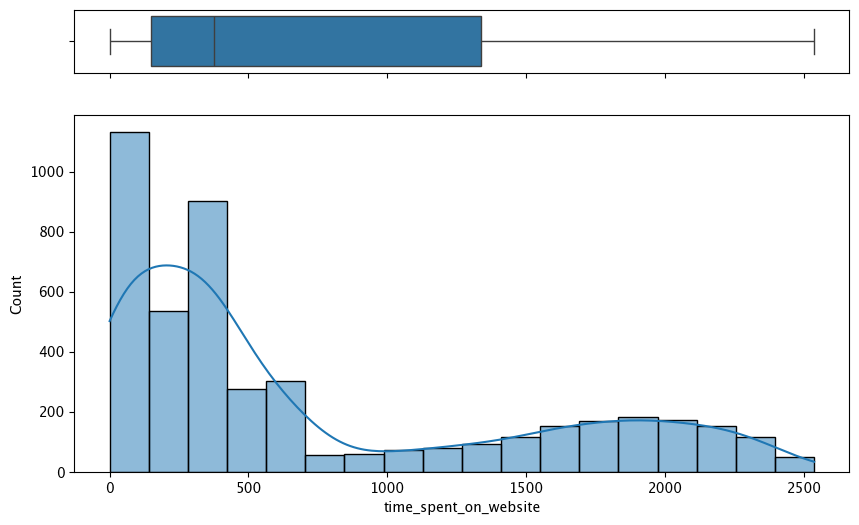

In [28]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (.15, .85)}, figsize=(10, 6))
sns.boxplot(data=data, x="time_spent_on_website", ax=ax_box)
sns.histplot(data=data, x="time_spent_on_website", kde=True, ax=ax_hist)
ax_box.set(xlabel='time_spent_on_website')

plt.show()

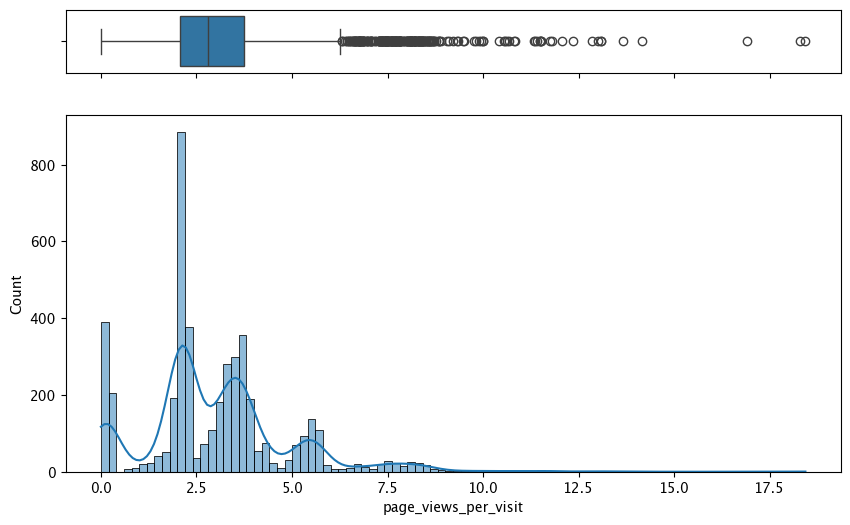

In [29]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (.15, .85)}, figsize=(10, 6))
sns.boxplot(data=data, x="page_views_per_visit", ax=ax_box)
sns.histplot(data=data, x="page_views_per_visit", kde=True, ax=ax_hist)
ax_box.set(xlabel='page_views_per_visit')

plt.show()

Text(0, 0.5, 'Percentage Attrition %')

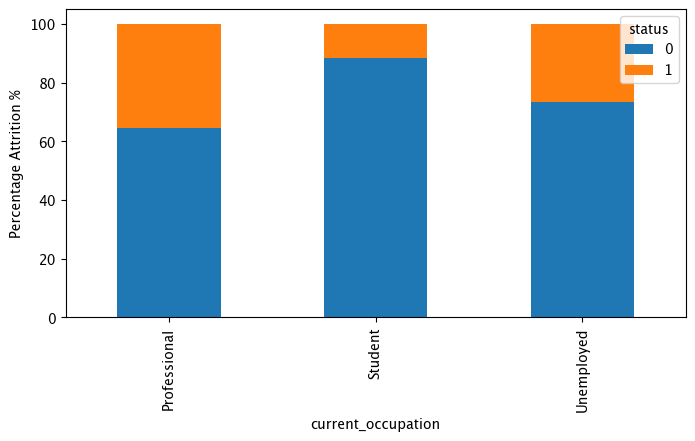

In [30]:
(pd.crosstab(data['current_occupation'],data['status'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
plt.ylabel('Percentage Conv %')


Text(0, 0.5, 'Percentage Attrition %')

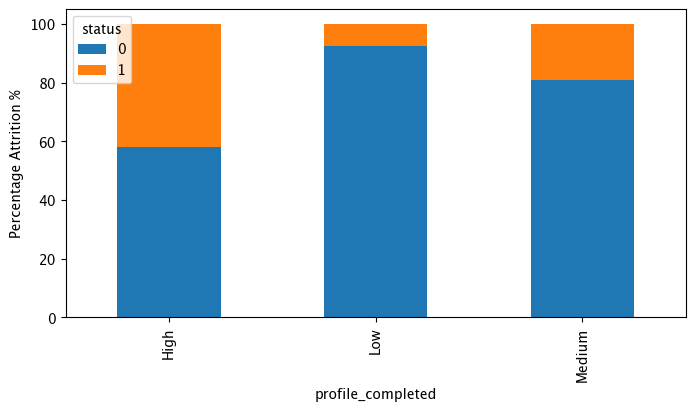

In [31]:
(pd.crosstab(data['profile_completed'],data['status'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
plt.ylabel('Percentage Conv %')

Text(0, 0.5, 'Percentage Attrition %')

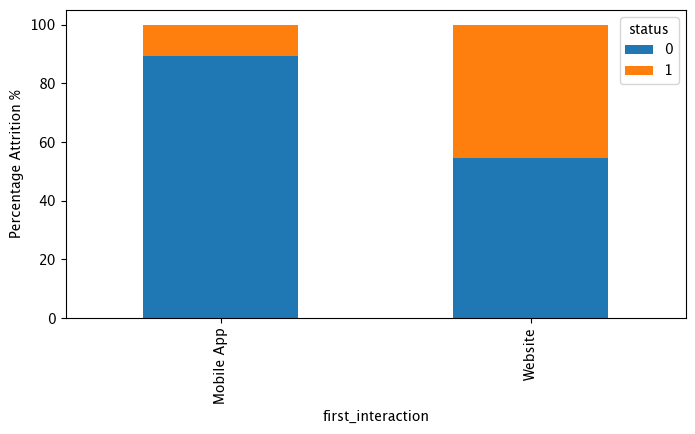

In [32]:
(pd.crosstab(data['first_interaction'],data['status'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
plt.ylabel('Percentage Conv %')

Text(0, 0.5, 'Percentage Attrition %')

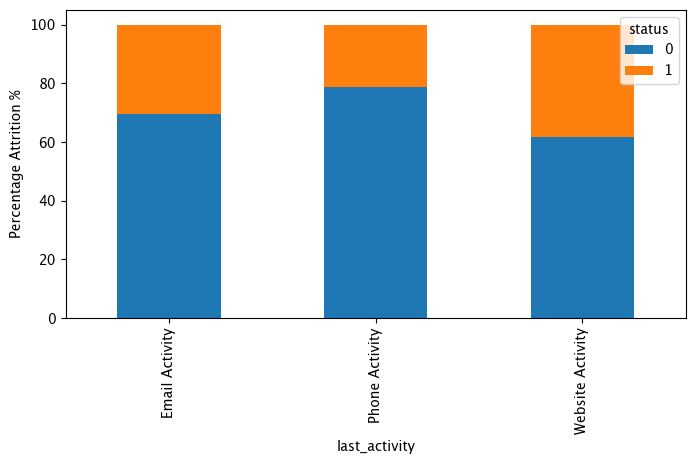

In [33]:
(pd.crosstab(data['last_activity'],data['status'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
plt.ylabel('Percentage Conv %')

Text(0, 0.5, 'Percentage Attrition %')

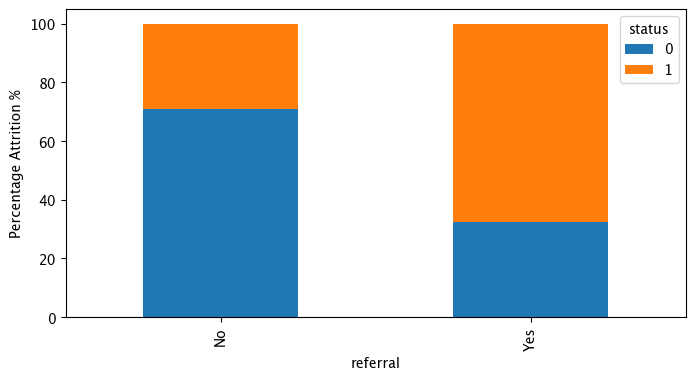

In [34]:
(pd.crosstab(data['referral'],data['status'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
plt.ylabel('Percentage Conv %')

Text(0, 0.5, 'Percentage Attrition %')

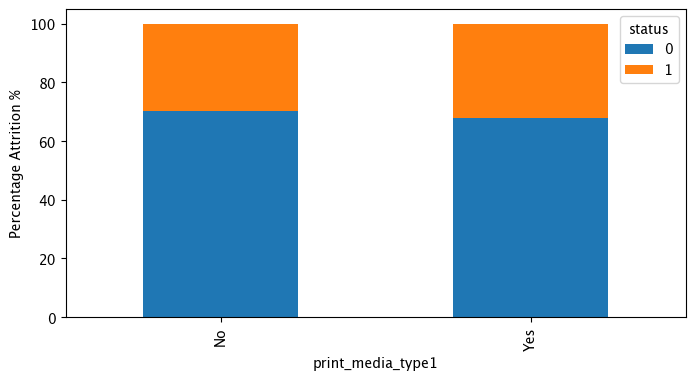

In [35]:
(pd.crosstab(data['print_media_type1'],data['status'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
plt.ylabel('Percentage Conv %')

Text(0, 0.5, 'Percentage Attrition %')

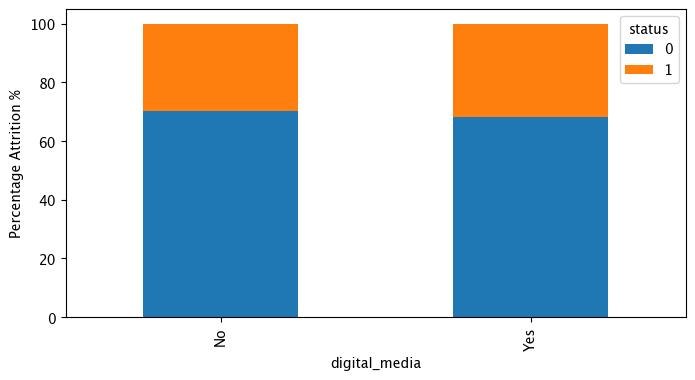

In [36]:
(pd.crosstab(data['digital_media'],data['status'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
plt.ylabel('Percentage Conv %')

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status? 
3. The company uses multiple modes to interact with prospects. Which way of interaction works best? 
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

In [37]:
data1=data.copy()
data1["age"].replace("inf", np.nan, inplace=True)



In [38]:
data1.isna().sum()

ID                       0
age                      0
current_occupation       0
first_interaction        0
profile_completed        0
website_visits           0
time_spent_on_website    0
page_views_per_visit     0
last_activity            0
print_media_type1        0
print_media_type2        0
digital_media            0
educational_channels     0
referral                 0
status                   0
dtype: int64

In [39]:
data1.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.86100,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.32000,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.07400,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.05700,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.91400,Email Activity,No,No,No,No,No,0


In [50]:
data1.drop(["ID"], axis=1, inplace=True)


In [51]:
data1["print_media_type2"].replace("No", 0, inplace=True)
data1["print_media_type2"].replace("Yes", 1, inplace=True)
data1["print_media_type1"].replace("No", 0, inplace=True)
data1["print_media_type1"].replace("Yes", 1, inplace=True)

In [52]:
data1["current_occupation"].replace("Unemployed", 0, inplace=True)
data1["current_occupation"].replace("Student", 1, inplace=True)
data1["current_occupation"].replace("Professional", 2, inplace=True)

In [53]:
data1["digital_media"].replace("No", 0, inplace=True)
data1["digital_media"].replace("Yes", 1, inplace=True)

In [54]:
data1["referral"].replace("No", 0, inplace=True)
data1["referral"].replace("Yes", 1, inplace=True)

In [55]:
data1["educational_channels"].replace("No", 0, inplace=True)
data1["educational_channels"].replace("Yes", 1, inplace=True)

In [56]:
data1["first_interaction"].replace("Website", 0, inplace=True)
data1["first_interaction"].replace("Mobile App", 1, inplace=True)

In [57]:
data1["profile_completed"].replace("Low", 0, inplace=True)
data1["profile_completed"].replace("Medium", 1, inplace=True)
data1["profile_completed"].replace("High", 2, inplace=True)

In [58]:
data1["last_activity"].replace("Website Activity", 0, inplace=True)
data1["last_activity"].replace("Email Activity", 1, inplace=True)
data1["last_activity"].replace("Phone Activity", 2, inplace=True)

## EDA

- It is a good idea to explore the data once again after manipulating it.

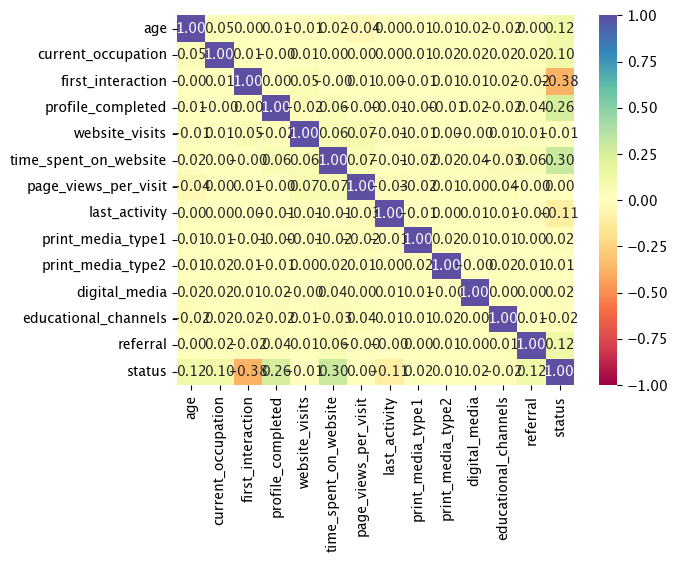

In [59]:
figsize=(90, 20)
sns.heatmap(data1.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

## Building a Decision Tree model

In [60]:
X = data1.drop(["status"], axis=1)
y = data1["status"]

In [141]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1,stratify=y)

In [142]:
def metrics_score(acc, pred):
    print(classification_report(acc, pred))
    cm = confusion_matrix(acc, pred)
    sns.heatmap(cm, annot=True, xticklabels=['Not a Consumer', 'Consumer'], yticklabels=['Not a consumer', 'Consumer'])
    plt.show()

In [143]:
model_dt= DecisionTreeClassifier(random_state=1,max_depth=7)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, random_state=1)

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      2588
           1       0.82      0.82      0.82      1101

    accuracy                           0.89      3689
   macro avg       0.87      0.87      0.87      3689
weighted avg       0.89      0.89      0.89      3689



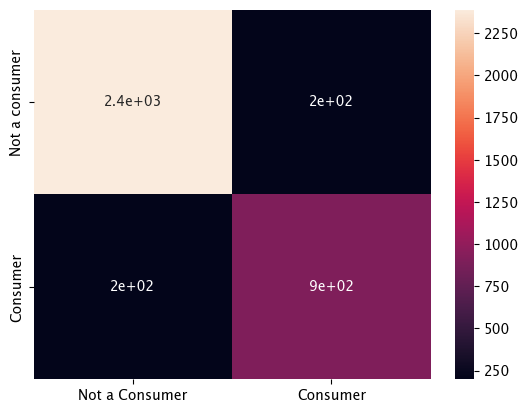

In [144]:
model_dt= DecisionTreeClassifier(random_state=1,max_depth=8)
model_dt.fit(X_train, y_train)


pred_train_dt = model_dt.predict(X_train)

metrics_score(y_train, pred_train_dt)

## Do we need to prune the tree?

              precision    recall  f1-score   support

           0       0.88      0.89      0.89       647
           1       0.74      0.72      0.73       276

    accuracy                           0.84       923
   macro avg       0.81      0.80      0.81       923
weighted avg       0.84      0.84      0.84       923



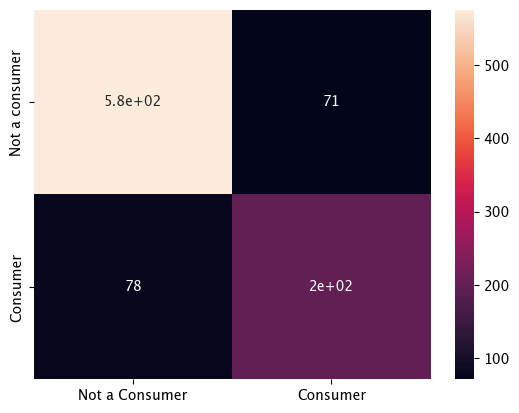

In [145]:
pred_test_dt = model_dt.predict(X_test)
metrics_score(y_test, pred_test_dt)

In [146]:
The scores do not to seem too high which means the data did not overfit. Therefore, we do not need to prune this tree.

SyntaxError: invalid syntax (3542836902.py, line 1)

## Building a Random Forest model

In [135]:
rf_estimator = RandomForestClassifier(random_state = 1)

rf_estimator.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

              precision    recall  f1-score   support

           0       0.92      0.95      0.93      2588
           1       0.87      0.81      0.84      1101

    accuracy                           0.91      3689
   macro avg       0.89      0.88      0.89      3689
weighted avg       0.91      0.91      0.91      3689



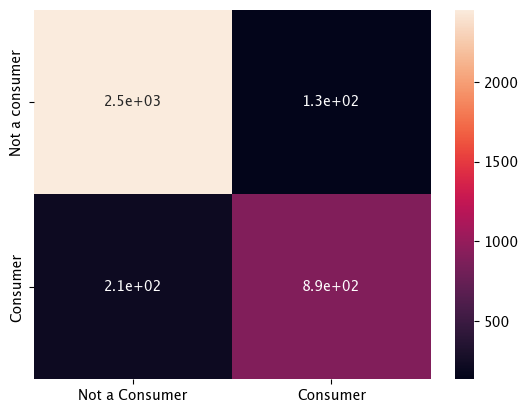

In [147]:
y_pred_train_rf = rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train_rf)

              precision    recall  f1-score   support

           0       0.92      0.95      0.94       647
           1       0.88      0.82      0.85       276

    accuracy                           0.91       923
   macro avg       0.90      0.89      0.89       923
weighted avg       0.91      0.91      0.91       923



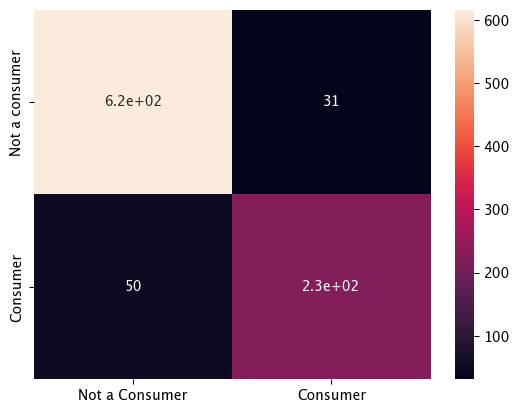

In [148]:
y_pred_test_rf = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test_rf)

## Do we need to prune the tree?

In [ ]:
The test is not too overfit which means we need to prune the tree. 

## Actionable Insights and Recommendations

In [123]:
The points that affect the conversion of a consumer are:
- First interaction
- Profile Completed
- Time spent on the website

The points that affect the conversion of a consumer less are:
- Referral
- Last Activity
- Occupation
- Age

The points that did not affect the conversion of a consumer are:
- Website Visits
- Page views per page
- Media types (1 and 2)
- Digital media
- Educational channels



The highest consumer conversion comes from  the first interaction with a consumer as an interaction on the website is shown to significantly be more effective than interactions on a mobile app. Their correlation is ~38% which means the status of a successful conversion is 38% correlated towards the first interaction.

Similarly, the people who completed their profile on a higher basis are much more likely to be converted than the people who completed their profile on a lower basis.

SyntaxError: invalid syntax (2740435569.py, line 1)